In [1]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import pickle
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import  Model
import math
import os
import matplotlib.pyplot as plt

In [2]:

def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model


In [3]:
def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [4]:
def extract_vector(model, image_path):
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Trich dac trung
    vector = model.predict(img_tensor)[0]
    # Chuan hoa vector = chia chia L2 norm (tu google search)
    vector = vector / np.linalg.norm(vector)
    return vector


In [5]:
def show_image(image_path):
    """Hiển thị ảnh từ đường dẫn đã cho."""
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(Image.open(image_path))
    plt.title("Hình ảnh từ đường dẫn")
    plt.axis('off')  # Ẩn trục
    plt.show()

In [22]:
data_folder = "dataset"
#
model = get_extract_model()
vectors = []
paths = [] 

for image_path in os.listdir(data_folder):

    image_path_full = os.path.join(data_folder,image_path)
    print("Xu ly : ", image_path_full)
    image_vector = extract_vector( model,image_path_full)
    print("Độ dài mảng:",len(image_vector))
    vectors.append(image_vector)
    paths.append(image_path_full)

# lưu lại 
vector_file = "vectors.pkl" 
path_file = "paths.pkl"

pickle.dump(vectors, open(vector_file, "wb"))
pickle.dump(paths, open(path_file, "wb"))


Xu ly :  dataset\0.jpg


c:\Users\Long\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_138']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Độ dài mảng: 4096
Xu ly :  dataset\10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Độ dài mảng: 4096
Xu ly :  dataset\100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Độ dài mảng: 4096
Xu ly :  dataset\1008.jpg
1/1 ━━━━━━

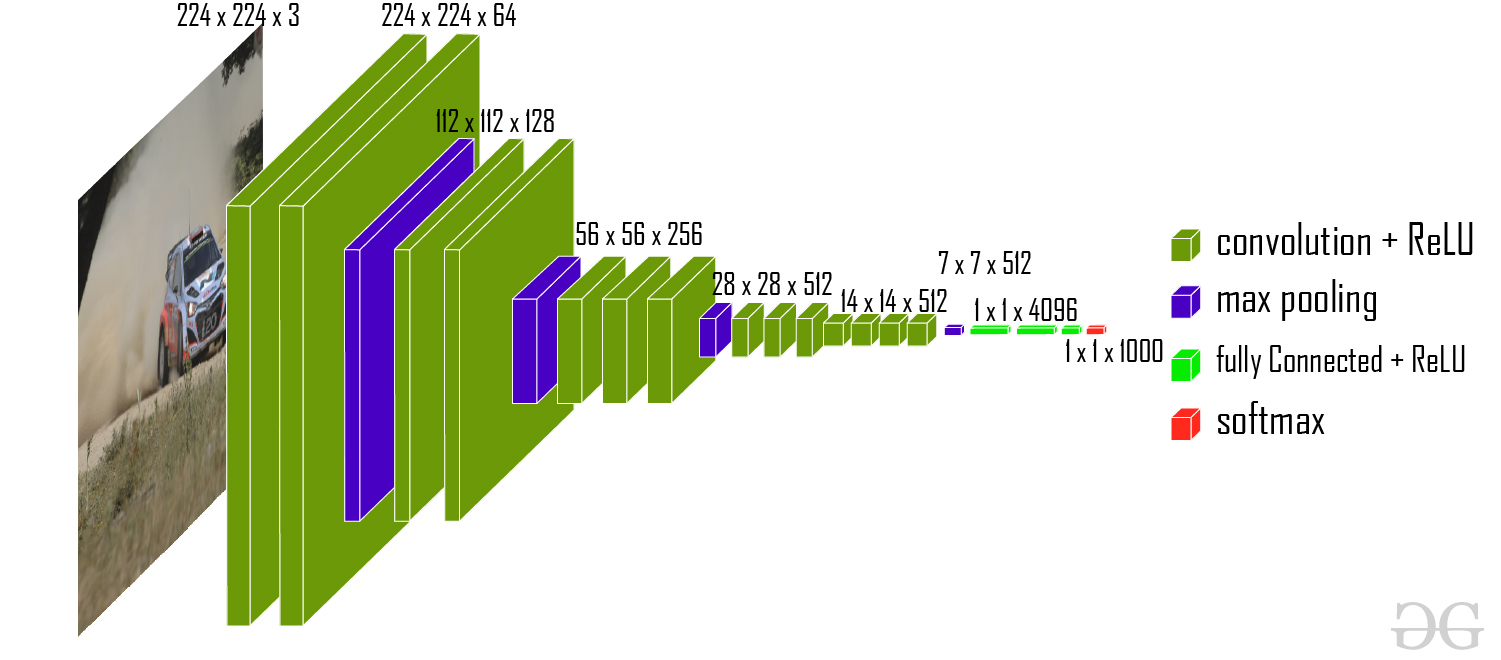

In [16]:

import pickle
import pandas as pd
import os

# Tải vector và đường dẫn từ các tệp đã lưu
def load_vectors_and_paths(vector_file, path_file):
    with open(vector_file, "rb") as f:
        vectors = pickle.load(f)
    with open(path_file, "rb") as f:
        paths = pickle.load(f)
    return vectors, paths

# Tạo file CSV từ vectors và paths
def create_csv_from_vectors(vector_file, path_file, csv_file):
    vectors, paths = load_vectors_and_paths(vector_file, path_file)
    
    # Tạo danh sách tên tệp từ đường dẫn
    names = [os.path.basename(path) for path in paths]
    
    # Chuyển đổi dữ liệu thành DataFrame
    df = pd.DataFrame({
        'name': names,
        'path': paths,
        'vector': [vec.tolist() for vec in vectors]  # Chuyển vector thành danh sách
    })

    # Chuyển đổi vector thành chuỗi không có dấu ngoặc
    df['vector'] = df['vector'].apply(lambda x: ' '.join(map(str, x)))

    # Lưu DataFrame vào file CSV
    df.to_csv(csv_file, index=False)

# Sử dụng hàm
vector_file = "vectors.pkl"
path_file = "paths.pkl"
csv_file = "data.csv"

create_csv_from_vectors(vector_file, path_file, csv_file)
print(f"Tạo thành công file {csv_file}.")
# Sử dụng hàm
csv_file = "data.csv"
df = pd.read_csv(csv_file)
print(df)

Tạo thành công file data.csv.
          name              path  \
0        0.jpg     dataset\0.jpg   
1        1.jpg     dataset\1.jpg   
2       10.jpg    dataset\10.jpg   
3      100.jpg   dataset\100.jpg   
4     1000.jpg  dataset\1000.jpg   
...        ...               ...   
4733   995.jpg   dataset\995.jpg   
4734   996.jpg   dataset\996.jpg   
4735   997.jpg   dataset\997.jpg   
4736   998.jpg   dataset\998.jpg   
4737   999.jpg   dataset\999.jpg   

                                                 vector  
0     0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....  
1     0.0 0.0 0.0 0.0 0.0 0.047690194100141525 0.0 0...  
2     0.0 0.0 0.0 0.0 0.0 0.0002296787133673206 0.0 ...  
3     0.0 0.0 0.0 0.0014126953901723027 0.0 0.014243...  
4     0.0 0.0 0.0 0.0232496727257967 0.0 0.012963773...  
...                                                 ...  
4733  0.0 0.0 0.0 0.0 0.0 0.019945627078413963 0.0 0...  
4734  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....  
4735  0.0 0.0 0

In [21]:
print(paths)
print(vectors,)

['dataset\\0.jpg', 'dataset\\1.jpg', 'dataset\\10.jpg', 'dataset\\100.jpg', 'dataset\\1000.jpg', 'dataset\\1001.jpg', 'dataset\\1002.jpg', 'dataset\\1003.jpg', 'dataset\\1004.jpg', 'dataset\\1005.jpg', 'dataset\\1006.jpg', 'dataset\\1007.jpg', 'dataset\\1008.jpg', 'dataset\\1009.jpg', 'dataset\\101.jpg', 'dataset\\1010.jpg', 'dataset\\1011.jpg', 'dataset\\1012.jpg', 'dataset\\1013.jpg', 'dataset\\1014.jpg', 'dataset\\1015.jpg', 'dataset\\1016.jpg', 'dataset\\1017.jpg', 'dataset\\1018.jpg', 'dataset\\1019.jpg', 'dataset\\102.jpg', 'dataset\\1020.jpg', 'dataset\\1021.jpg', 'dataset\\1022.jpg', 'dataset\\1023.jpg', 'dataset\\1024.jpg', 'dataset\\1025.jpg', 'dataset\\1026.jpg', 'dataset\\1027.jpg', 'dataset\\1028.jpg', 'dataset\\1029.jpg', 'dataset\\103.jpg', 'dataset\\1030.jpg', 'dataset\\1031.jpg', 'dataset\\1032.jpg', 'dataset\\1033.jpg', 'dataset\\1034.jpg', 'dataset\\1035.jpg', 'dataset\\1036.jpg', 'dataset\\1037.jpg', 'dataset\\1038.jpg', 'dataset\\1039.jpg', 'dataset\\104.jpg', 'dat

In [32]:
def image_show(rearest_img):
    axes = []
    grid_size = int(math.sqrt(x))
    fig =  plt.figure(figsize= (10,5))
    for id in range(x):
        draw_img = rearest_img[id]
        axes.append(fig.add_subplot(grid_size,grid_size,id+1))
        axes[-1].set_title('d= ' + str(draw_img[1]))
        plt.imshow(Image.open(draw_img[0]))

    fig.tight_layout()
    plt.show()

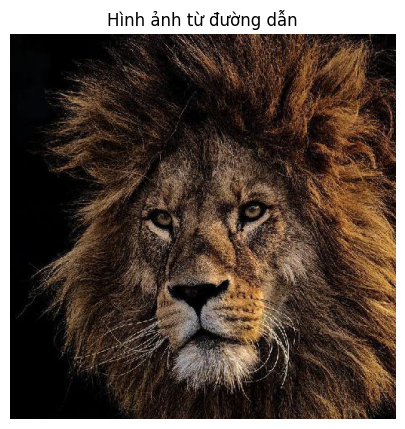

c:\Users\Long\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_184']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


In [35]:
sreach_img = "dataset/4.jpg";
show_image(sreach_img)

# khởi tạo model
model2 = get_extract_model();
# trích đặc trưng ảnh truyền vào   
sreach_vector = extract_vector(model2,sreach_img);
# load vector ra 
vectors = pickle.load(open("vectors.pkl","rb"))
paths = pickle.load(open("paths.pkl","rb"))



tìm trong:  4738
[1.0999696  1.1189374  1.050852   ... 1.1137187  0.7951859  0.85747385]
[3334 3374 1480 3408 2331 3064 3510 4561  236 3190 1917 3081 1235  832
  653  791]
[('dataset\\4.jpg', 0.0), ('dataset\\4034.jpg', 0.5411922), ('dataset\\233.jpg', 0.54372364), ('dataset\\4065.jpg', 0.5668073), ('dataset\\3096.jpg', 0.56828475), ('dataset\\3756.jpg', 0.58678275), ('dataset\\4157.jpg', 0.58729506), ('dataset\\84.jpg', 0.5886184), ('dataset\\121.jpg', 0.59082556), ('dataset\\387.jpg', 0.59084165), ('dataset\\2723.jpg', 0.5927779), ('dataset\\3771.jpg', 0.5956703), ('dataset\\2109.jpg', 0.59687805), ('dataset\\1747.jpg', 0.5973066), ('dataset\\1586.jpg', 0.59772146), ('dataset\\171.jpg', 0.6016494)]


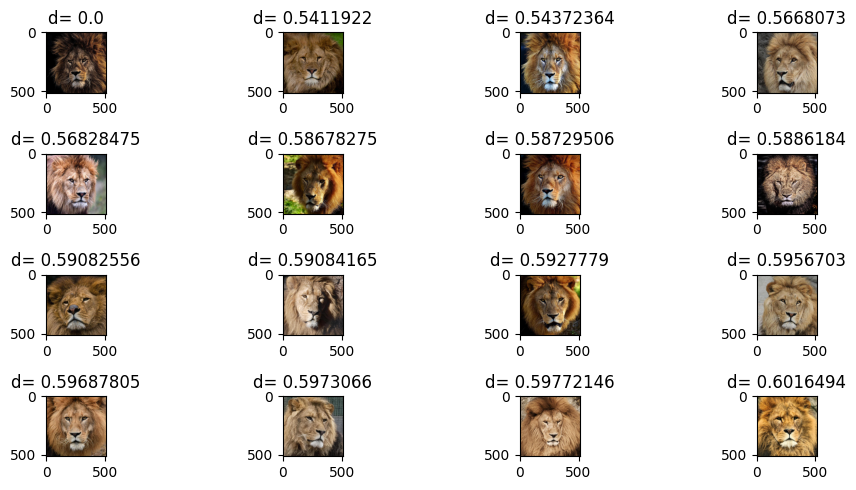

In [62]:
# Tìm ảnh Euclidean
distane = np.linalg.norm(vectors -sreach_vector,axis=1)
print('tìm trong: ',len(distane))
print(distane)
x =16
ids = np.argsort(distane)[:x]
print(ids)
rearest_img = [(paths[id],distane[id]) for id in ids]
print(rearest_img)

image_show(rearest_img)

In [68]:
import numpy as np
from scipy.spatial.distance import cosine, euclidean

def find_closest_features(new_vector, feature_list, top_k=5, metric='cosine'):
    distances = []
    # Tính khoảng cách giữa vector mới và tất cả các vector trong list
    for i, vector in enumerate(feature_list):
        if metric == 'cosine':
            dist = cosine(new_vector, vector)  # Khoảng cách Cosine
        elif metric == 'euclidean':
            dist = euclidean(new_vector, vector)
            
              # Khoảng cách Euclidean
        distances.append((dist))  # Lưu index và khoảng cách
    # Trả về top_k vector gần nhất
    return distances

In [69]:

# Tìm  ảnh có đặc trưng gần nhất theo khoảng cách Cosine
x = 16
closest_features = find_closest_features(sreach_vector, vectors, top_k=50, metric='cosine')
print('List khoản các gần nhất:', closest_features)

ids = np.argsort(closest_features)[:x]
print('List vị trí: ', ids)
print('List path: ',paths)
rearest_img = [(paths[id],closest_features[id]) for id in ids]
print('Ghép dường đẫn anh lại: ',rearest_img)
image_show(rearest_img)


IndexError: invalid index to scalar variable.

List khoản các gần nhất: [1.099969744682312, 1.118937373161316, 1.0508519411087036, 0.7257585525512695, 1.0542515516281128, 1.0685784816741943, 1.1051781177520752, 0.7427424192428589, 1.257613182067871, 1.128174901008606, 1.1856716871261597, 1.0455596446990967, 0.8247773051261902, 1.1283669471740723, 1.2089074850082397, 1.2873677015304565, 0.6935968399047852, 1.153860330581665, 1.1009726524353027, 1.0456293821334839, 1.179244875907898, 1.0612820386886597, 1.119324803352356, 1.109087586402893, 1.1212537288665771, 0.7266792058944702, 1.1693416833877563, 0.8512352108955383, 1.2204508781433105, 0.907433807849884, 1.2699517011642456, 1.1521177291870117, 0.9398930072784424, 1.1602228879928589, 0.8864137530326843, 0.993456244468689, 1.1231873035430908, 0.6842526197433472, 1.2043712139129639, 1.281181812286377, 1.0393978357315063, 1.0916322469711304, 0.9920316934585571, 1.1965224742889404, 1.302863597869873, 1.0715502500534058, 1.1939877271652222, 1.1052122116088867, 1.1280947923660278, 1.1170

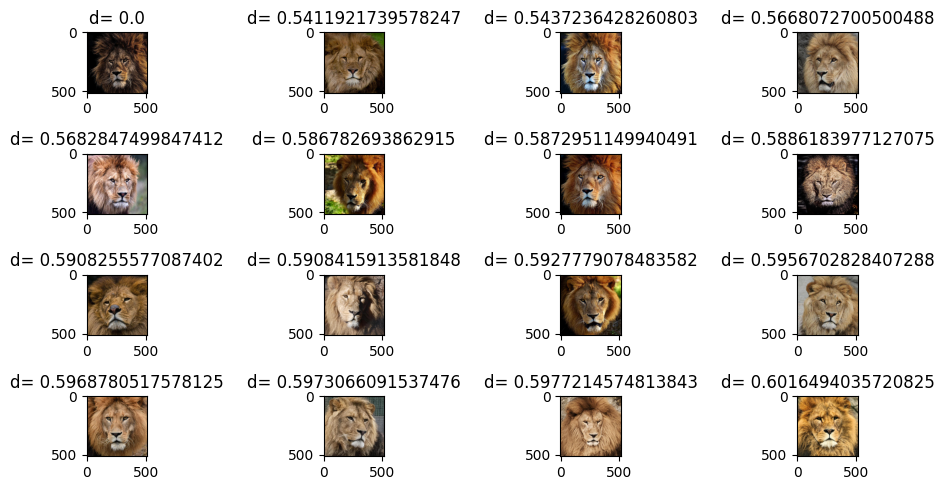

In [67]:
x = 16
closest_features = find_closest_features(sreach_vector, vectors, top_k=50, metric='euclidean')
print('List khoản các gần nhất:', closest_features)

ids = np.argsort(closest_features)[:x]
print('List vị trí: ', ids)
print('List path: ',paths)
rearest_img = [(paths[id],closest_features[id]) for id in ids]
print('Ghép dường đẫn anh lại: ',rearest_img)
image_show(rearest_img)